In [4]:
from DNC_matching import *
import matplotlib.pyplot as plt
from disambiguation.core import Database, Person
import numpy as np


In [5]:
idm = get_idm()


Table 'identities_v5' exists.
Table 'identities_adjacency_v5' exists.
Table 'linked_identities_v5' exists.
select id,identity from identities_v5;
select id,identity from identities_v5;
SELECT identity1,identity2, verdict from identities_adjacency_v5;


In [6]:
retriever = Database.FecRetrieverByID('usa_combined_v2')
retriever.set_idm(idm)

In [7]:
idm

<disambiguation.core.Database.IdentityManager instance at 0x2375ea290>

In [41]:
idm = Database.IdentityManager('USA')
idm.fetch_dict_id_2_identity()
idm.fetch_dict_identity_2_id()
idm.fetch_dict_identity_adjacency()


Table 'identities_v5' exists.
Table 'identities_adjacency_v5' exists.
Table 'linked_identities_v5' exists.
select id,identity from identities_v5;
select id,identity from identities_v5;
SELECT identity1,identity2, verdict from identities_adjacency_v5;


In [42]:
tokens = None

In [175]:
main_task(idm)

          1500 SUMMIT AVE
          1500 SUMMIT AVE
0          102        ----- ANN MEANY SAINT PAUL MN 55105
          1632 DEER RUN
          1632 DEER RUN
1          130        ----- ROBERT ZINKHAN SANTA ROSA CA 95405
          5689 E QUARTZ MOUNTAIN RD
          5689 E QUARTZ MOUNTAIN RD
2          249        ----- GARY MATTOX PARADISE VALLEY AZ 85253
          2411 RIVER BEND CT.
          2411 RIVER BEND CT
3          272        ----- DONALD KROPIDLOWSKI PLOVER WI 54467
          3 BOND ST # 3
          3 BOND ST APT 3
4          695        ----- THOMAS CARON PORTLAND ME 4102
cannot convert float NaN to integer
          6011 RUNNING CREEK CT.
          6011 RUNNING CREEK CT
5          750        ----- JENNIFER LINN KINGWOOD TX 77345
          2649 E 26TH ST
          2649 E 26TH ST
6          832        ----- VICKI BAKER TULSA OK 74114
          1902 WHENONA DR
          1902 WHENONA DR
7          1154       ----- MARKOS REGASSA MADISON WI 53711
          2441 WATERCOURSE WAY
  

KeyboardInterrupt: 

#  Using the name frequencies file

In [58]:
import pandas as pd
filename = '/nfs/home/navid/data/FEC/voter_registration/vf_name_frequencies.csv'
data_nf = pd.read_csv(filename)
print data_nf.columns

Index([u'personid', u'first_name', u'last_name', u'state_code', u'zipcode', u'voters_in_country', u'voters_in_state', u'voters_in_zip5'], dtype='object')


In [55]:
filename = '/nfs/home/navid/data/FEC/voter_registration/DNC_results.csv'
data_m = pd.read_csv(filename)


CParserError: Error tokenizing data. C error: Expected 2 fields in line 93, saw 3


In [111]:
len(data)

4550

# Interpreting the results

In [65]:
import numpy as np

In [130]:
filename = '/nfs/home/navid/data/FEC/voter_registration/DNC_results_annotated.csv'
data = pd.read_csv(filename, sep='|')

## Select and export all rows with verdicts 'q'*n

(array([ 0,  0, 85, 26,  9,  2,  2,  0,  1,  0,  2,  1,  1,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
         17.5,  18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,
         26.5,  27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5]),
 <a list of 34 Patch objects>)

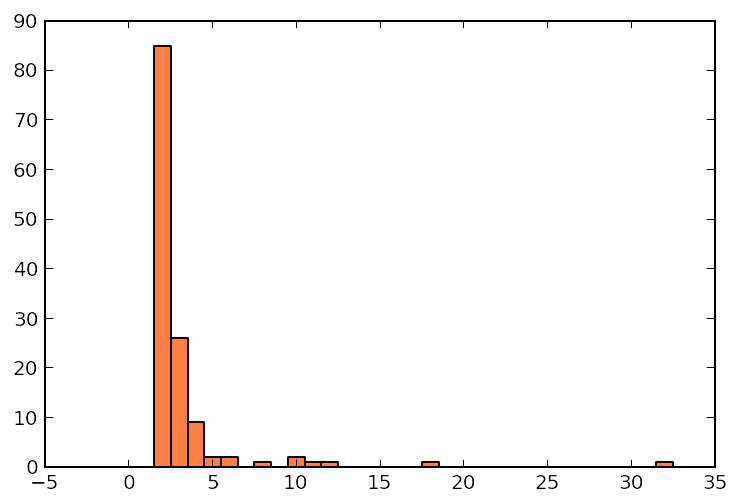

In [139]:
df = data[['verdict','voter_index']]
unsure = data[data['voter_index'].notnull() & data['verdict'].notnull()]
# print unsure

# array with columns "freq_zip" and "freq_state"
freqs = unsure[['freq_zip', 'freq_state']].values
# plt.scatter(freqs[:,0], freqs[:,1])
plt.hist(freqs[:,0], color = '#ff8040', bins = np.arange(35)-0.5)

(array([ 0,  0, 12,  7,  1,  1,  1,  2,  1,  1,  1,  0,  0,  0,  2,  1,  0,
         0,  0,  0,  0,  3,  1,  2,  1,  0,  1,  2,  0,  0,  2,  0,  1,  0,
         0,  0,  0,  1,  1,  1,  0,  2,  0,  1,  1,  0,  0,  1,  0,  0,  0,
         1,  0,  1,  0,  1,  2,  0,  0,  0,  0,  1,  0,  0,  1,  1,  1,  0,
         0,  0,  0,  1,  0,  0,  1,  1,  0,  1,  2,  0,  0,  1,  3,  0,  0,
         0,  1,  0,  2,  0,  0,  1,  1,  0,  1,  0,  1,  0,  0,  0,  1,  0,
         0,  3,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
         0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]),
 array([  -0.5,    0.5,    1.5,    2.5,    3.5,    4.5,    5.5,    6.5,
           7.5,    8.5,    9.5,   

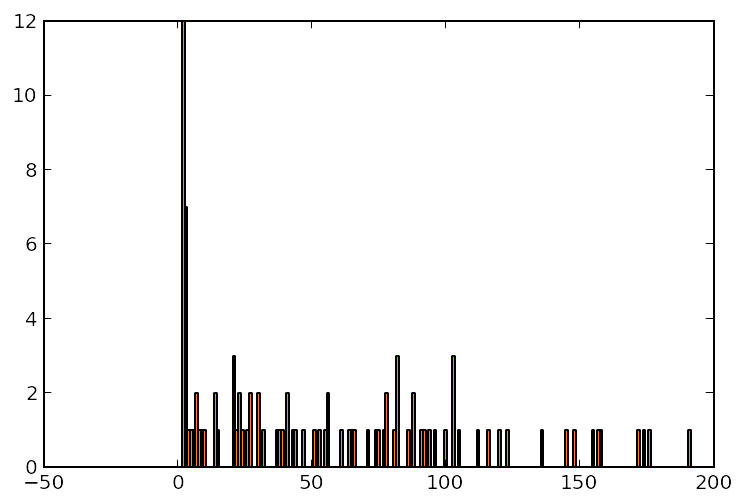

In [149]:
plt.hist(freqs[:,1], color = '#ff8040', bins = np.arange(200)-0.5)

In [161]:
unsure[(unsure['freq_zip'] < 3) & (unsure['freq_state'] < 50)][['freq_zip','freq_state']]

freq_zip  freq_state
141          2           2
174          2           2
216          2          27
243          2          27
261          2          21
282          2          26
333          2           7
369          2           5
447          2          30
459          2           7
492          2           3
603          2          39
615          2           3
636          2           2
702          2           3
750          2          37
765          2           2
771          2           2
810          2           2
831          2          24
918          2           2
930          2           3
957          2          15
972          2           3
1020         2           3
1131         2          43
1143         2           4
1167         2           2
1410         2          38
1425         2          41
1437         2          22
1443         2           2
1488         2          10
1569         2          47
1623         2           2
1653         2          21
1665         2           9
1785         2           2
1791         2          41
1821         2           2

## export all matches to csv file 

In [8]:
allmatches = data[data['voter_index'].notnull()][['verdict','identity','voter_index','freq_zip','freq_state']]
allmatches.to_csv('/nfs/home/navid/data/FEC/voter_registration/allmatches.csv', sep = '|')

KeyError: 'voter_index'

## join all matches with full DNC file 

In [9]:
filename = '/nfs/home/navid/data/FEC/voter_registration/voterfile_sample100k_20150624.csv'
dncdata = pd.read_csv(filename)

allmatches = pd.read_csv('/nfs/home/navid/data/FEC/voter_registration/allmatches.csv', sep = '|')

In [10]:
dncmerged = pd.merge(dncdata, allmatches, left_on = ['personid'], right_on=['voter_index'])

In [11]:
# Complete dataframe of sure mathces
dncmerged_sure = dncmerged[dncmerged['verdict'].isnull()]

# Complete dataframe of unsure matches.
dncmerged_unsure = dncmerged[dncmerged['verdict'].notnull()]



## Extract further data  from FEC records 

In [12]:
dnc = dncmerged_sure
dict_persons = {}
# dnc[['identity','personid']]
for index, row in dnc.iterrows():
    identity = row['identity']
    list_identities = [identity] + idm.get_linked_identities(identity)
    r_ids = [rid  for idty in list_identities for rid in idm.get_ids(idty)]
#     print r_ids
    retriever.retrieve(r_ids)
    list_records = retriever.getRecords()
    person = Person.Person(list_records)
    dict_persons[identity] = person
    


dict_linked_identities not loaded. Loading now...
select identity1, identity2 from linked_identities_v5;


In [16]:
p = dict_persons.items()[0][1]
print p.set_of_records

set([{'N_zipcode': [], 'N_middle_name': [], 'OCCUPATION': 'MORTGAGE BROKER', 'NAME': u'ORMOND, WILLIAM', 'ENTITY_TP': u'IND', 'CITY': u'LAGUNA NIGUEL', 'TRANSACTION_AMT': 205.0, 'TRANSACTION_DT': '20050331', 'CONTRIBUTOR_STREET_1': u'19 DANFORTH AVE', 'N_first_name': [], 'STATE': u'CA', 'N_address': [], 'CMTE_ID': u'C00131185', 'N_last_name': [], 'EMPLOYER': 'ORANGE COAST EQUITIES', 'id': 5860782L, 'ZIP_CODE': u'926775700'}, {'N_zipcode': [], 'N_middle_name': [], 'OCCUPATION': 'MORTGAGE BROKER', 'NAME': u'ORMOND, WILLIAM', 'ENTITY_TP': u'IND', 'CITY': u'LAGUNA NIGUEL', 'TRANSACTION_AMT': 205.0, 'TRANSACTION_DT': '20050629', 'CONTRIBUTOR_STREET_1': u'19 DANFORTH AVE', 'N_first_name': [], 'STATE': u'CA', 'N_address': [], 'CMTE_ID': u'C00131185', 'N_last_name': [], 'EMPLOYER': 'ORANGE COAST EQUITIES', 'id': 5860823L, 'ZIP_CODE': u'926775700'}])


## Some functions for extracting FEC info 

In [24]:
def get_total_donation(person, condition):
    return sum([r['TRANSACTION_AMT'] for r in person.set_of_records if condition(r)])

def get_num_states(person, condition):
    return len(set([r['STATE'] for r in person.set_of_records if condition(r)]))

In [30]:
list_amounts = []
list_data = []

# Only consider records from  2011 to  2014 (4 years)
start_date, end_date = ('2011', '2015')
# start_date, end_date = ('1979', '2016')
condition_date = lambda r: ((r['TRANSACTION_DT'] > start_date) and (r['TRANSACTION_DT'] < end_date))

for identity, person in dict_persons.iteritems():
    amount = get_total_donation(person, condition_date)
    num_states = get_num_states(person, condition_date)
#     print identity,amount
    list_amounts.append(amount)
    list_data.append((identity, amount, num_states))
df = pd.DataFrame(list_data, columns=['identity', 'amount', 'num_states'])
filename = '/nfs/home/navid/data/FEC/voter_registration/fec_data_%s_to_%s.csv' % (start_date, end_date)
df.to_csv(filename,index = False)


In [31]:
print 'number of records satisfying the supplied condition:', len(df[df['amount'] > 0 ])

number of records satisfying the supplied condition: 1375


-400.0 1648695.0


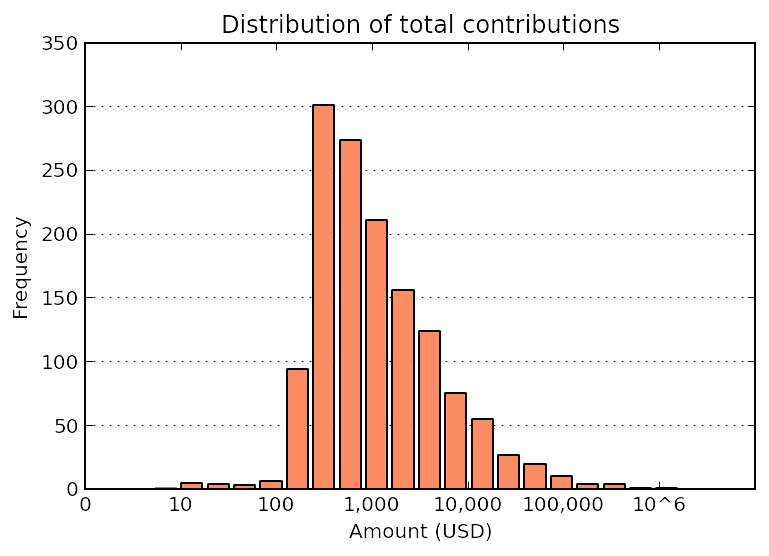

In [285]:
#     page = p.page('Two-staged (hierarchical) clustering', trans='none')
#     div = page.r(1).top()
#     div.c(1).w('20%').par('Stage 1:').left().margin('0px')
#     l = div.c(2).ul()
#     l.item('Within each state <b>separately</b>')
#     l.item('More <b>conservative</b> (strict matching)')
#     l.item('Hi <b>precision</b>: clusters are internally consistent')
#     page.vspace('1em')
#     div = page.r(2).top()
#     div.c(1).w('20%').par('Stage 2:').left().margin('0px')
#     l = div.c(2).ul()
#     l.item('<b>National</b> level matching of stage 1 clusters')
#     l.item('cluster similarities are quantified')
#     page.im('hierarchical-clustering-2.png').cl('white')print min(list_amounts), max(list_amounts)
amounts = [amount for amount in list_amounts if amount > 0 ]

fig, ax = plt.subplots()
ax.grid(axis= 'y', zorder=1)

ax.hist(np.log10(amounts),
        bins = 20,
#          bins = np.arange(1900,2000,10),
#          normed = True,
         color ='#fc8d62',
         alpha=1,
         histtype='bar',
         rwidth=0.8,
         zorder=3)
ax.set_xticklabels([0,10,100,'1,000','10,000', '100,000', '10^6'])
# plt.yticks(range(0,35,5))
plt.title('Distribution of total contributions')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
# plt.ylim([0,0.04])
plt.savefig('amount_distribution.svg')

(array([1317,    0,   49,    0,   12,    0,    4,    0,    2,    2]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ]),
 <a list of 10 Patch objects>)

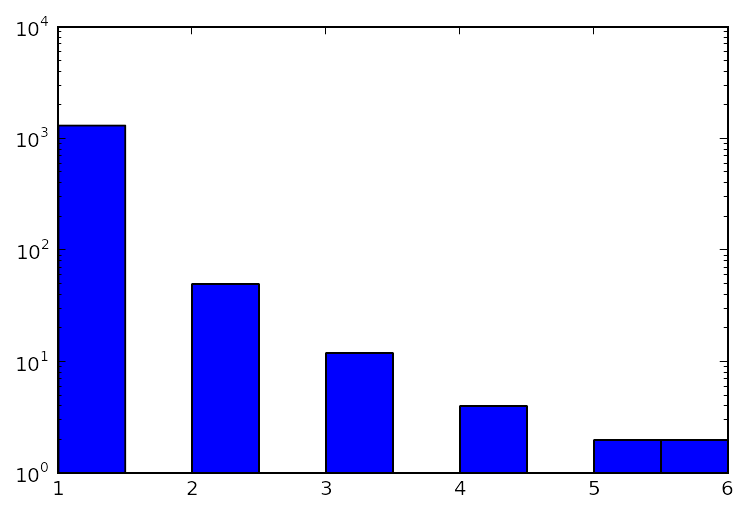

In [284]:
plt.hist([data[2] for data in list_data], log='y')

In [289]:
dict_persons['CO-18443'].set_of_records

{{'CITY': u'DENVER',
  'CMTE_ID': u'C00000935',
  'CONTRIBUTOR_STREET_1': u'461 RACE ST',
  'EMPLOYER': 'N/A',
  'ENTITY_TP': u'IND',
  'NAME': u'GILL, TIM',
  'N_address': [],
  'N_first_name': [],
  'N_last_name': [],
  'N_middle_name': [],
  'N_zipcode': [],
  'OCCUPATION': 'RETIRED',
  'STATE': u'CO',
  'TRANSACTION_AMT': 5000.0,
  'TRANSACTION_DT': '20040923',
  'ZIP_CODE': u'80206',
  'id': 3670523L},
 {'CITY': u'DENVER',
  'CMTE_ID': u'C00000935',
  'CONTRIBUTOR_STREET_1': u'461 RACE ST',
  'EMPLOYER': 'N/A',
  'ENTITY_TP': u'IND',
  'NAME': u'GILL, TIM',
  'N_address': [],
  'N_first_name': [],
  'N_last_name': [],
  'N_middle_name': [],
  'N_zipcode': [],
  'OCCUPATION': 'RETIRED',
  'STATE': u'CO',
  'TRANSACTION_AMT': 10000.0,
  'TRANSACTION_DT': '20070321',
  'ZIP_CODE': u'80206',
  'id': 7714006L},
 {'CITY': u'DENVER',
  'CMTE_ID': u'C00000935',
  'CONTRIBUTOR_STREET_1': u'461 RACE ST',
  'EMPLOYER': 'N/A',
  'ENTITY_TP': u'IND',
  'NAME': u'GILL, TIM',
  'N_address': [],


# Prepare plots 

In [202]:
colors = ["#66c2a5","#fc8d62", "#8da0cb"]

## Plot the the sex makeup 

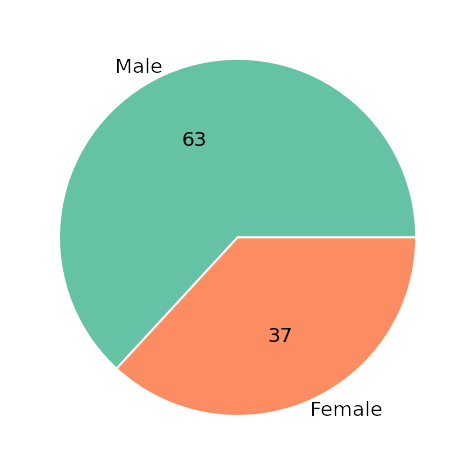

In [219]:
num_female = sum(dncmerged_sure['sex'] == 'F')
num_male = sum(dncmerged_sure['sex'] == 'M')

makeup_sex = [num_male, num_female]




labels = ['Male', 'Female']
angle = 90

properties = {'colors':colors, 'labels': labels, 'labeldistance':1.05, 'autopct': '%0.0f'}

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
pie_wedge_collection = plt.pie(makeup_sex, **properties);
# pie_wedge_collection = ax.pie(makeup_sex, colors=colors, labels=labels, labeldistance=1.05, startangle=angle);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')


In [99]:
freqs = np.array(data[['freq_zip', 'freq_state']])
verdicts = data[['verdict']]

In [103]:
indices = np.isnan(freqs[:,0]) == False
freqs_good = freqs[indices]

In [105]:
verdicts[indices] == 'q'

verdict
0      False
3       True
6      False
9      False
12     False
15     False
18      True
21     False
24     False
27     False
30     False
33     False
36     False
39     False
42     False
45     False
48     False
51     False
54     False
57     False
60     False
63     False
66      True
69     False
72      True
75     False
78     False
81     False
84     False
87     False
...      ...
4461   False
4464   False
4467   False
4470   False
4473   False
4476   False
4479   False
4482   False
4485   False
4488   False
4491   False
4494   False
4497   False
4500   False
4503   False
4506   False
4509   False
4512   False
4515   False
4518   False
4521   False
4524   False
4527   False
4530   False
4533   False
4536   False
4539   False
4542   False
4545   False
4548   False

[1517 rows x 1 columns]

In [100]:
freqs

array([[  1.,   3.],
       [ nan,  nan],
       [ nan,  nan],
       ..., 
       [ nan,  nan],
       [  1.,  14.],
       [ nan,  nan]])